In [1]:
# Analysis of Economic Time Series (Python)

# import packages for time series analysis and modeling
import pandas as pd  # data structures for time series analysis
import datetime  # date manipulation
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA  # time series modeling
from statsmodels.tsa.stattools import grangercausalitytests as granger

# additional time series functions available in R
# from rpy2.robjects import r  # interface from Python to R

# Economic time series were originally obtained from
# the Federal Reserve Bank of St. Louis (FRED system).
#
# National Civilian Unemployment Rate (monthly, percentage)
#     converted to the employment rate ER = 100 - UNRATENSA
#
# Manufacturers' New Orders: Durable Goods (millions of dollars) 
#     DGO = DGORDER/1000 expressed in  billions of dollars 
#
# University of Michigan Index of Consumer Sentiment (1Q 1966 = 100)
#     ICS = UMCSENT
#
# New Homes Sold in the US, not seasonally adjusted (monthly, millions)
#     NHS = HSN1FNSA   

# read data in from comma-delimited text files
ER_data_frame = pd.read_csv("FRED_ER_data.csv")
DGO_data_frame = pd.read_csv("FRED_DGO_data.csv")
ICS_data_frame = pd.read_csv("FRED_ICS_data.csv")
NHS_data_frame = pd.read_csv("FRED_NHS_data.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


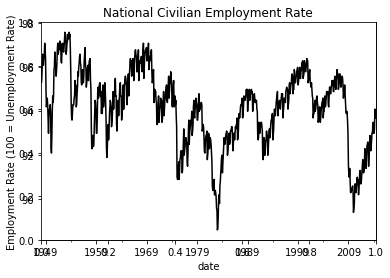

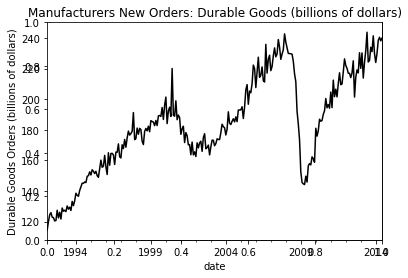

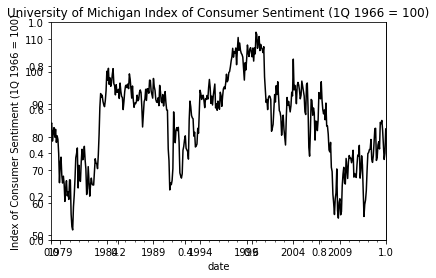

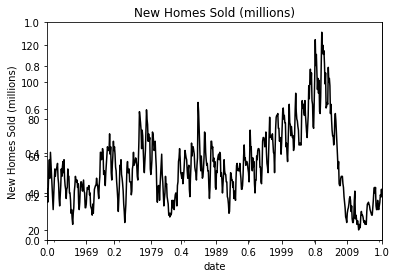

In [2]:
# identify date fields as dates with apply and lambda function
ER_data_frame['date'] = \
    ER_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))
DGO_data_frame['date'] = \
    DGO_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))
ICS_data_frame['date'] = \
    ICS_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))
NHS_data_frame['date'] = \
    NHS_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))

# create data frames indexed by date
ER_data = ER_data_frame.set_index(['date']) 
DGO_data = DGO_data_frame.set_index(['date']) 
ICS_data = ICS_data_frame.set_index(['date']) 
NHS_data = NHS_data_frame.set_index(['date']) 

# plot the individual time series
# National Civilian Employment Rate
fig, axis = plt.subplots()
axis = fig.add_subplot(1, 1, 1)
axis.set_xlabel('Date')
axis.set_ylabel('Employment Rate (100 = Unemployment Rate)')
axis.set_title('National Civilian Employment Rate')
ER_data['ER'].plot(ax = axis, style = 'k-')
plt.savefig('fig_ER_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

# Manufacturers New Orders: Durable Goods (billions of dollars) 
fig, axis = plt.subplots()
axis = fig.add_subplot(1, 1, 1)
axis.set_xlabel('Date')
axis.set_ylabel('Durable Goods Orders (billions of dollars)')
axis.set_title\
    ('Manufacturers New Orders: Durable Goods (billions of dollars)')
DGO_data['DGO'].plot(ax = axis, style = 'k-')
plt.savefig('fig_DGO_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

# University of Michigan Index of Consumer Sentiment (1Q 1966 = 100)
fig, axis = plt.subplots()
axis = fig.add_subplot(1, 1, 1)
axis.set_xlabel('Date')
axis.set_ylabel('Index of Consumer Sentiment (1Q 1966 = 100)')
axis.set_title\
    ('University of Michigan Index of Consumer Sentiment (1Q 1966 = 100)')
ICS_data['ICS'].plot(ax = axis, style = 'k-')
plt.savefig('fig_ICS_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

# New Homes Sold in the US, not seasonally adjusted (monthly, millions)
fig, axis = plt.subplots()
axis = fig.add_subplot(1, 1, 1)
axis.set_xlabel('Date')
axis.set_ylabel('New Homes Sold (millions)')
axis.set_title('New Homes Sold (millions)')
NHS_data['NHS'].plot(ax = axis, style = 'k-')
plt.savefig('fig_NHS_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

In [3]:
# merge the time series data frames
economic_mts = pd.merge(ER_data, DGO_data,\
    how = 'outer', left_index = True, right_index = True)
economic_mts = pd.merge(economic_mts, ICS_data,\
    how = 'outer', left_index = True, right_index = True)
economic_mts = pd.merge(economic_mts, NHS_data,\
    how = 'outer', left_index = True, right_index = True)
print(economic_mts.shape)
print(economic_mts.tail())

(798, 4)
              ER      DGO  ICS   NHS
date                                
2014-02-01  93.0  229.864  NaN  35.0
2014-03-01  93.2  238.420  NaN  39.0
2014-04-01  94.1  240.481  NaN  38.0
2014-05-01  93.9  238.160  NaN  42.0
2014-06-01  93.7  239.917  NaN  38.0


In [4]:
# select dates with complete data on all four series
modeling_mts = economic_mts.dropna()
print(modeling_mts.head)

<bound method NDFrame.head of               ER      DGO   ICS   NHS
date                                 
1992-02-01  91.8  114.535  68.8  55.0
1992-03-01  92.2  120.025  76.0  56.0
1992-04-01  92.8  124.470  77.2  53.0
1992-05-01  92.7  125.822  79.2  52.0
1992-06-01  92.0  122.834  80.4  53.0
...          ...      ...   ...   ...
2013-08-01  92.7  225.292  82.1  31.0
2013-09-01  93.0  233.988  77.5  31.0
2013-10-01  93.0  231.075  73.2  36.0
2013-11-01  93.4  241.438  75.1  32.0
2013-12-01  93.5  229.813  82.5  31.0

[263 rows x 4 columns]>


In [5]:
# select time series for multiple time series plot
initial_plotting_mts = \
    pd.DataFrame(modeling_mts, columns = ["ER","DGO","ICS","NHS"])
print(initial_plotting_mts.head)

<bound method NDFrame.head of               ER      DGO   ICS   NHS
date                                 
1992-02-01  91.8  114.535  68.8  55.0
1992-03-01  92.2  120.025  76.0  56.0
1992-04-01  92.8  124.470  77.2  53.0
1992-05-01  92.7  125.822  79.2  52.0
1992-06-01  92.0  122.834  80.4  53.0
...          ...      ...   ...   ...
2013-08-01  92.7  225.292  82.1  31.0
2013-09-01  93.0  233.988  77.5  31.0
2013-10-01  93.0  231.075  73.2  36.0
2013-11-01  93.4  241.438  75.1  32.0
2013-12-01  93.5  229.813  82.5  31.0

[263 rows x 4 columns]>


Text(0.5, 0, '')

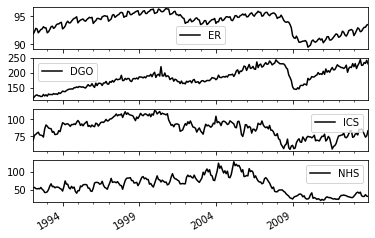

In [6]:
# create multiple time series plot
initial_plotting_mts.plot(subplots = True, style = 'k-', sharex = True,)
plt.legend(loc = 'best')
plt.xlabel('')

In [7]:
# using March 1997 as reference data 
print(modeling_mts.loc['1997-03-01'])  # (ICS = 100 on this date)

ER      94.500
DGO    167.719
ICS    100.000
NHS     81.000
Name: 1997-03-01 00:00:00, dtype: float64


In [8]:
# define indexing constants 
indexing_constant = modeling_mts.loc['1997-03-01']
ER0 = indexing_constant['ER']
DGO0 = indexing_constant['DGO']
NHS0 = indexing_constant['NHS']

In [9]:
# compute indexed time series
modeling_mts['IER'] = \
    modeling_mts['ER'].apply(lambda d: (d/ER0) * 100) 
modeling_mts['IDGO'] = \
    modeling_mts['DGO'].apply(lambda d: (d/DGO0) * 100) 
modeling_mts['INHS'] = \
    modeling_mts['NHS'].apply(lambda d: (d/NHS0) * 100) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [10]:
# create working multiple time series with just the indexed series
working_economic_mts = \
    pd.DataFrame(modeling_mts, columns = ["IER","IDGO","ICS","INHS"])
print(working_economic_mts.head)

<bound method NDFrame.head of                   IER        IDGO   ICS       INHS
date                                              
1992-02-01  97.142857   68.289818  68.8  67.901235
1992-03-01  97.566138   71.563150  76.0  69.135802
1992-04-01  98.201058   74.213416  77.2  65.432099
1992-05-01  98.095238   75.019527  79.2  64.197531
1992-06-01  97.354497   73.237975  80.4  65.432099
...               ...         ...   ...        ...
2013-08-01  98.095238  134.327059  82.1  38.271605
2013-09-01  98.412698  139.511922  77.5  38.271605
2013-10-01  98.412698  137.775088  73.2  44.444444
2013-11-01  98.835979  143.953875  75.1  39.506173
2013-12-01  98.941799  137.022639  82.5  38.271605

[263 rows x 4 columns]>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  


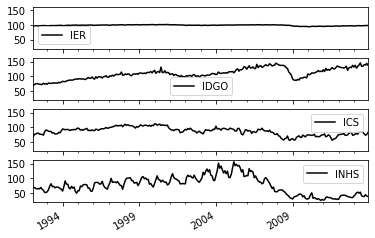

In [ ]:
# create multiple time series plot
working_economic_mts.plot(subplots = True,  \
     sharex = True, sharey = True, style = 'k-')
plt.legend(loc = 'best')
plt.xlabel('')
plt.savefig('fig_economic_time_series_indexed_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

In [11]:
# return to the individual economic time series prior to indexing  
# functions from statsmodels package for time series forecasting 

# ARIMA model search for the Employment Rate
# ignoring seasonal adjustments
# loop across alternative settings for p and q 
# p is order of autoregressive process (1 or 2)
# q is order of moving-average process (1 or 2)
# choose model with lowest AIC
print('\nER_arima_model Search')
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        ER_arima_model = ARIMA(ER_data['ER'], order = (p,1,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', ER_arima_model.aic)


ER_arima_model Search


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR: 1 MA: 1 AIC: 1069.521230091115


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR: 1 MA: 2 AIC: 1044.9730592480716


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR: 2 MA: 1 AIC: 1032.915473186058


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR: 2 MA: 2 AIC: 798.1580652559137


In [12]:
# for first differenced ER models searched, AR p=2 MA q=2 is best
ER_arima_model_selected = ARIMA(ER_data['ER'], order = (2,1,2)).fit()
# fitted parameters of the selected model
print(ER_arima_model_selected.params)
# look-ahead forecasts needed 


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        -0.003288
ar.L1.D.ER    0.999997
ar.L2.D.ER   -0.999989
ma.L1.D.ER   -0.999333
ma.L2.D.ER    0.997019
dtype: float64


In [13]:
# ARIMA model search for the Durable Goods Orders
# ignoring seasonal adjustments
# loop across alternative settings for p and q 
# p is order of autoregressive process (1 or 2)
# q is order of moving-average process (1 or 2)
# choose model with lowest AIC
print('\nDGO_arima_model Search')
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        DGO_arima_model = ARIMA(DGO_data['DGO'], order = (p,1,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', DGO_arima_model.aic)     


DGO_arima_model Search
AR: 1 MA: 1 AIC: 1809.8728167119484


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR: 1 MA: 2 AIC: 1794.9953947002605
AR: 2 MA: 1 AIC: 1805.0328958344974
AR: 2 MA: 2 AIC: 1805.5885866801639


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [14]:
# for first differenced DGO models searched, AR p=1 MA q=2 is best
DGO_arima_model_selected = ARIMA(DGO_data['DGO'], order = (1,1,2)).fit()
# fitted parameters of the selected model
print(DGO_arima_model_selected.params)
# look-ahead forecasts needed 

# ARIMA model search for the Index of Consumer Sentiment
# ignoring seasonal adjustments
# loop across alternative settings for p and q 
# p is order of autoregressive process (1 or 2)
# q is order of moving-average process (1 or 2)
# choose model with lowest AIC
print('\nICS_arima_model Search')
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        ICS_arima_model = ARIMA(ICS_data['ICS'], order = (p,0,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', ICS_arima_model.aic)
# for ICS models searched, AR p=2 MA q=2 is best
ICS_arima_model_selected = ARIMA(ICS_data['ICS'], order = (2,0,2)).fit()
# fitted parameters of the selected model
print(ICS_arima_model_selected.params)
# look-ahead forecasts needed 

# ARIMA model search for New Homes Sold
# ignoring seasonal adjustments
# loop across alternative settings for p and q 
# p is order of autoregressive process (1 or 2)
# q is order of moving-average process (1 or 2)
# choose model with lowest AIC
print('\nNHS_arima_model Search')
for pindex in range(2):
    for qindex in range(2):
        p = pindex + 1
        q = qindex + 1
        NHS_arima_model = ARIMA(NHS_data['NHS'], order = (p,1,q)).fit()
        print('AR:', p, 'MA:', q, 'AIC:', NHS_arima_model.aic)
# for first differenced NHS models searched, AR p=2 MA q=2 is best 
NHS_arima_model_selected = ARIMA(NHS_data['NHS'], order = (2,1,2)).fit()
# fitted parameters of the selected model
print(NHS_arima_model_selected.params)
# look-ahead forecasts needed 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const          0.487772
ar.L1.D.DGO    0.749792
ma.L1.D.DGO   -1.243141
ma.L2.D.DGO    0.514039
dtype: float64

ICS_arima_model Search
AR: 1 MA: 1 AIC: 2424.38211706085


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR: 1 MA: 2 AIC: 2422.1155435231553
AR: 2 MA: 1 AIC: 2426.107832283136


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR: 2 MA: 2 AIC: 2421.229122458444


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        84.700318
ar.L1.ICS     1.475421
ar.L2.ICS    -0.488723
ma.L1.ICS    -0.537739
ma.L2.ICS    -0.105884
dtype: float64

NHS_arima_model Search
AR: 1 MA: 1 AIC: 4046.598838311666


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR: 1 MA: 2 AIC: 4018.074141180441


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR: 2 MA: 1 AIC: 4008.3737177948665


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR: 2 MA: 2 AIC: 3901.308925940619


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const         -0.022653
ar.L1.D.NHS    1.699291
ar.L2.D.NHS   -0.954603
ma.L1.D.NHS   -1.735112
ma.L2.D.NHS    0.910158
dtype: float64


In [22]:
# Which regressors have potential as leading indicators?
# look for relationships across three of the time series
# using the period of overlap for those series

# does time series in second column "cause" time series in first column
print('Granger Tests')
# R form of test: grangertest(ICS~ER, order = 3, data=modeling.mts)
ICS_from_ER =  pd.DataFrame(modeling_mts, columns = ['ICS','ER'])
test = granger(ICS_from_ER, maxlag = 3, addconst=True, verbose=True)
print('ICS_from_ER:',test[3][0]['params_ftest'])

Granger Tests

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2871  , p=0.0710  , df_denom=259, df_num=1
ssr based chi2 test:   chi2=3.3251  , p=0.0682  , df=1
likelihood ratio test: chi2=3.3042  , p=0.0691  , df=1
parameter F test:         F=3.2871  , p=0.0710  , df_denom=259, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6961  , p=0.0262  , df_denom=256, df_num=2
ssr based chi2 test:   chi2=7.5366  , p=0.0231  , df=2
likelihood ratio test: chi2=7.4298  , p=0.0244  , df=2
parameter F test:         F=3.6961  , p=0.0262  , df_denom=256, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1766  , p=0.0913  , df_denom=253, df_num=3
ssr based chi2 test:   chi2=6.7104  , p=0.0817  , df=3
likelihood ratio test: chi2=6.6253  , p=0.0848  , df=3
parameter F test:         F=2.1766  , p=0.0913  , df_denom=253, df_num=3
ICS_from_ER: (2.1765910631057444, 0.0912685125877236, 253.0, 3.0)


In [23]:
# R form of test: grangertest(ICS~DGO, order = 3, data=modeling.mts)
ICS_from_DGO =  pd.DataFrame(modeling_mts, columns = ['ICS','DGO'])
test = granger(ICS_from_DGO, maxlag = 3, addconst=True, verbose=False)
print('ICS_from_DGO:',test[3][0]['params_ftest'])

# R form of test: grangertest(DGO~ER, order = 3, data=modeling.mts)
DGO_from_ER =  pd.DataFrame(modeling_mts, columns = ['DGO','ER'])
test = granger(DGO_from_ER, maxlag = 3, addconst=True, verbose=False)
print('DGO_from_ER:',test[3][0]['params_ftest'])

# R form of test: grangertest(DGO~ICS, order = 3, data=modeling.mts)
DGO_from_ICS =  pd.DataFrame(modeling_mts, columns = ['DGO','ICS'])
test = granger(DGO_from_ICS, maxlag = 3, addconst=True, verbose=False)
print('DGO_from_ICS:',test[3][0]['params_ftest'])

# R form of test: grangertest(ER~DGO, order = 3, data=modeling.mts)
ER_from_DGO =  pd.DataFrame(modeling_mts, columns = ['ER','DGO'])
test = granger(ER_from_DGO, maxlag = 3, addconst=True, verbose=False)
print('ER_from_DGO:',test[3][0]['params_ftest'])

# R form of test: grangertest(ER~ICS, order = 3, data=modeling.mts)
ER_from_ICS =  pd.DataFrame(modeling_mts, columns = ['ER','ICS'])
test = granger(ER_from_ICS, maxlag = 3, addconst=True, verbose=False)
print('ER_from_ICS:',test[3][0]['params_ftest'])

# Suggestions for the student:
# Explore additional forecasting methods such as exponential smoothing.
# Explore dynamic linear models and state space approaches.
# Gather data on additional economic measures that might be regarded
# as leading indicators. Select an industry to study, examine relevant 
# economic indicators and possible relationships to financial performance 
# of companies within that industry (stock prices or returns).

ICS_from_DGO: (4.8000989021615394, 0.002860712285773513, 253.0, 3.0)
DGO_from_ER: (3.557117070918777, 0.014945293007074355, 253.0, 3.0)
DGO_from_ICS: (0.9972515219591069, 0.39470877951350836, 253.0, 3.0)
ER_from_DGO: (0.5569459852450045, 0.6439306777419408, 253.0, 3.0)
ER_from_ICS: (10.743205784397977, 1.139578083488055e-06, 253.0, 3.0)
